In [ ]:
deserialize(...): Returns activation function given a string identifier.
elu(...): Exponential Linear Unit.
exponential(...): Exponential activation function.
get(...): Returns function.
hard_sigmoid(...): Hard sigmoid activation function.
linear(...): Linear activation function (pass-through).
relu(...): Applies the rectified linear unit activation function.
selu(...): Scaled Exponential Linear Unit (SELU).
serialize(...): Returns the string identifier of an activation function.
sigmoid(...): Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).
softmax(...): Softmax converts a real vector to a vector of categorical probabilities.
softplus(...): Softplus activation function, softplus(x) = log(exp(x) + 1).
softsign(...): Softsign activation function, softsign(x) = x / (abs(x) + 1).
swish(...): Swish activation function, swish(x) = x * sigmoid(x).
tanh(...): Hyperbolic tangent activation function.

In [73]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import EarlyStopping
import pandas as pd
pd.set_option('Display.max_rows',None)
from IPython.display import display, clear_output


def xor_test(activation_function='sigmoid', learning_rate=0.1, verbose=0, optimizer='adam', epochs=1000):
    # the four different states of the XOR gate
    training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

    # the four expected results in the same order
    target_data = np.array([[0],[1],[1],[0]], "float32")

    model = Sequential()
    model.add(Dense(16, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['binary_accuracy'])

    history = model.fit(training_data, target_data, epochs=epochs, verbose=verbose)
    #print(model.predict(training_data))
    return history.history


In [165]:
results = pd.DataFrame(columns=['loss','binary_accuracy','activation','learning_rate'])
activation_functions =  [
    'deserialize', 'elu', 'exponential', 'get', 'hard_sigmoid',
    'linear', 'relu', 'selu', 'serialize', 'sigmoid', 'softmax',
    'softplus', 'softsign', 'swish', 'tanh'
]
optimizers = ['SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl', 'rmsprop']
learning_rates = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

counter = 0
for af in activation_functions:
    for lr in learning_rates:
        clear_output(wait=True)
        counter+=1
        print('run#:',counter)
        print(af,lr)
        df = xor_test(af, verbose=0, learning_rate=lr, epochs=500)
        df = pd.DataFrame(df)
        df['activation'] = af
        df['learning_rate'] = lr
        try:
            df = df[df['binary_accuracy']==max(df['binary_accuracy'])].iloc[0]
            results = results.append(df)
        except:
            continue

res = results.reset_index().rename(columns={'index':'epoch'}).drop(columns={'loss'})
res = res[res['binary_accuracy']==1]
res.groupby(['activation','learning_rate','binary_accuracy']).mean().unstack('learning_rate')
#res.set_index(['activation','learning_rate','binary_accuracy']).unstack('learning_rate')

run#: 1500
tanh 5.0


epoch                                      \
learning_rate                        0.5         1.0         1.5         2.0   
activation   binary_accuracy                                                   
deserialize  1.0               68.200000  113.200000  103.300000  184.000000   
elu          1.0              116.300000  103.500000   79.800000  116.700000   
exponential  1.0              128.700000   99.800000  120.111111  100.500000   
get          1.0               70.900000  179.555556  123.200000  109.100000   
hard_sigmoid 1.0              112.500000  133.200000  106.400000   76.900000   
linear       1.0               95.600000  123.800000  134.600000  113.500000   
relu         1.0              146.200000  111.600000   92.800000  132.111111   
selu         1.0               97.400000   81.800000  110.400000   84.900000   
serialize    1.0               77.400000  109.000000  116.600000  116.300000   
sigmoid      1.0              144.400000  112.900000  131.400000  108.000000   
softmax      1.0               83.200000  150.900000   64.800000  103.700000   
softplus     1.0              112.300000  145.100000   89.700000  136.600000   
softsign     1.0               72.200000   67.400000   84.300000   89.400000   
swish        1.0               83.444444  125.800000   91.900000  115.200000   
tanh         1.0              131.000000   99.700000  103.900000  116.000000   

                                                                    \
learning_rate                   2.5         3.0         3.5    4.0   
activation   binary_accuracy                                         
deserialize  1.0              160.3  122.400000  129.100000  182.0   
elu          1.0              116.9   77.333333  136.500000   83.8   
exponential  1.0              123.5  112.444444  117.800000   93.1   
get          1.0              133.4   89.500000  115.100000   98.7   
hard_sigmoid 1.0              148.1  117.600000  131.500000  104.8   
linear       1.0              122.4  166.666667  121.200000  135.5   
relu         1.0              107.9  114.000000  114.000000  136.4   
selu         1.0               85.1   82.300000  133.500000   61.4   
serialize    1.0               86.1   94.200000  106.300000  144.6   
sigmoid      1.0               88.9  101.000000  146.200000  148.4   
softmax      1.0              125.7  111.444444  111.600000  158.2   
softplus     1.0               76.3   90.300000  106.555556   76.8   
softsign     1.0               77.5   97.700000  141.800000   84.3   
swish        1.0               97.7  159.100000  116.200000   91.9   
tanh         1.0               77.7   65.100000   84.444444  128.9   

                                                      
learning_rate                        4.5         5.0  
activation   binary_accuracy                          
deserialize  1.0              175.666667   69.400000  
elu          1.0               94.900000   77.800000  
exponential  1.0              149.700000  134.111111  
get          1.0              109.777778  131.700000  
hard_sigmoid 1.0               86.900000   89.333333  
linear       1.0               78.800000   80.222222  
relu         1.0              133.100000  111.200000  
selu         1.0              113.600000  134.600000  
serialize    1.0               99.444444   96.000000  
sigmoid      1.0               75.800000  139.500000  
softmax      1.0              151.600000  124.600000  
softplus     1.0               62.900000  104.200000  
softsign     1.0               95.800000   97.400000  
swish        1.0               96.500000  144.800000  
tanh         1.0              164.666667  142.100000

In [166]:
res[res['binary_accuracy']==1][['activation','epoch']].groupby('activation').mean().sort_values('epoch')

,epoch
activation,
softsign,90.780000
selu,98.500000
softplus,100.010101
elu,100.585859
serialize,104.646465
hard_sigmoid,110.939394
tanh,111.081633
swish,112.545455
get,115.510204


In [179]:
res.groupby(['learning_rate']).mean()


,epoch,binary_accuracy
learning_rate,,
0.5,102.778523,1.0
1.0,116.731544,1.0
1.5,103.436242,1.0
2.0,113.402685,1.0
2.5,108.500000,1.0
3.0,106.458904,1.0
3.5,121.128378,1.0
4.0,115.253333,1.0
4.5,111.931507,1.0


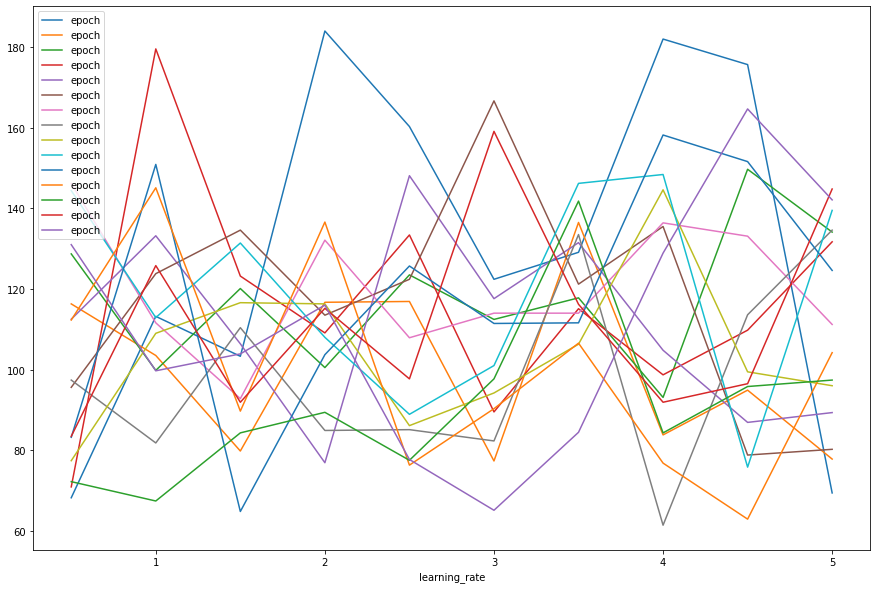

In [167]:
import matplotlib.pyplot as plt

p_res = res.groupby(['activation','learning_rate','binary_accuracy']).mean()
p_res = p_res.reset_index().drop(columns='binary_accuracy')

fig, ax = plt.subplots(figsize=(15,10))
p_res.groupby('activation').plot('learning_rate','epoch', ax=ax)
plt.show()

In [111]:
res = results.reset_index().rename(columns={'index':'epoch'}).drop(columns={'loss'})
res.groupby(['activation','learning_rate']).mean().unstack('learning_rate')

epoch               binary_accuracy            
learning_rate   0.01   0.02   0.03            0.01   0.02 0.03
activation                                                    
deserialize    100.8  103.6  128.4             1.0  0.975  1.0

In [81]:
results = pd.DataFrame(columns=['loss','binary_accuracy','activation','optimizer'])

activation_functions =  ['linear', 'relu','tanh']
optimizers = ['SGD','RMSprop','Adam']*10

for af in activation_functions:
    for opt in optimizers:
        clear_output(wait=True)
        print(af, opt)
        df = xor_test(af, verbose=0, optimizer=opt, epochs=1000, learning_rate=0.01)
        df = pd.DataFrame(df)
        df['activation'] = af
        df['optimizer'] = opt
        df = df[df['binary_accuracy']==max(df['binary_accuracy'])].iloc[0]
        results = results.append(df)

res = results.reset_index().rename(columns={'index':'epoch'}).drop(columns={'loss'})
res.set_index(['activation','optimizer','binary_accuracy']).unstack('optimizer')

res = results.reset_index().rename(columns={'index':'epoch'}).drop(columns={'loss'})
res.groupby(['activation','optimizer','binary_accuracy']).mean().unstack('optimizer')

tanh Adam


epoch             
optimizer                   Adam RMSprop  SGD
activation binary_accuracy                   
linear     1.0                77      65  728
relu       1.0               101      78  447
tanh       1.0                89     150  724

In [83]:
results = pd.DataFrame(columns=['loss','binary_accuracy','activation','optimizer'])

activation_functions =  ['linear', 'relu', 'tanh']
optimizers = ['Adadelta']

for af in activation_functions:
    for opt in optimizers:
        clear_output(wait=True)
        print(af, opt)
        df = xor_test(af, verbose=0, optimizer=opt, epochs=100000, learning_rate=0.01)
        df = pd.DataFrame(df)
        df['activation'] = af
        df['optimizer'] = opt
        df = df[df['binary_accuracy']==max(df['binary_accuracy'])].iloc[0]
        results = results.append(df)

res = results.reset_index().rename(columns={'index':'epoch'}).drop(columns={'loss'})
res.set_index(['activation','optimizer','binary_accuracy']).unstack('optimizer')

tanh Adadelta


,,epoch
,optimizer,Adadelta
activation,binary_accuracy,
linear,1.0,12036
relu,1.0,29139
tanh,1.0,31138
